# **WORLD HAPPINESS SCORE PROJECT**

**Context**

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness

# **AIM**

This would be a project to investigate the correlations and carry out exploratory data analysis (EDA) on the World Happiness Report. Hopefully build a good model that can predict the HAPPINESS SCORE

Details show that If you **add all these factors up, you get the happiness score**. So, we will try to visualize as much as data to make sure this assumption(as of now) or statement stands true.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
df = pd.read_csv('happiness_score_dataset.csv', header=0)

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

Data set has **158 rows** and **12 columns** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There are **No Null Values**. 1 column is Integer datatype, 9 float and 2 Object or categorical datatype<br>
"Happiness score" would be our target variable.

## Understanding the data

In [6]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

So the countries are divided into 10 regions.<br> 

In [7]:
df.Country[0:5]

0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
Name: Country, dtype: object

These are the top 5 Happiest coutries according to the data.

In [8]:
df.Country[-5:]

153     Rwanda
154      Benin
155      Syria
156    Burundi
157       Togo
Name: Country, dtype: object

These are the lowest 5 Happiest coutries according to the data. We can say not Happy countries at all

The columns : "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity" would be the data collected from different countries.<br>

The sum of above features and the "Dystopia Residual" seems to give the "Happiness Score" when added together.<br>
"Standard Error" would be the error while recording the values using different indexes.

## Visualizations

<AxesSubplot:>

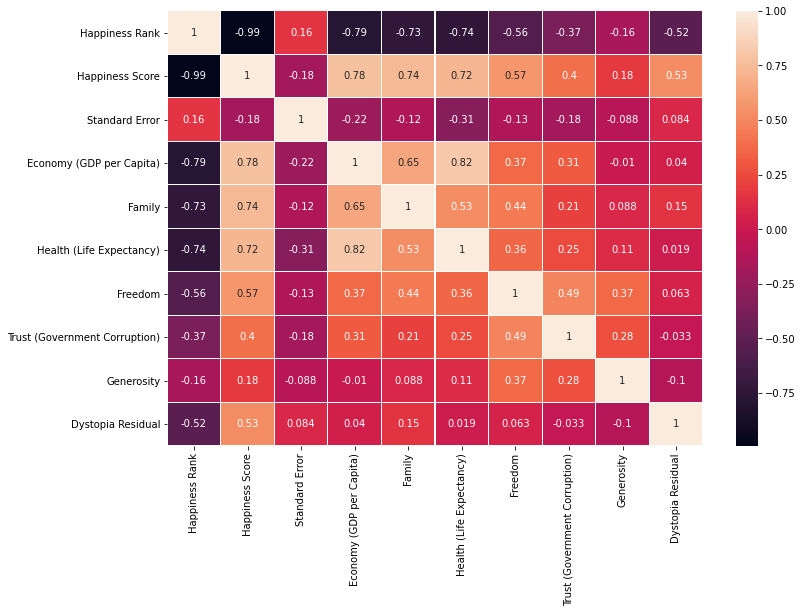

In [9]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, linewidths=0.1, )

1) We infer that "Economy", "Family", "Health", "Dystopia Residual" and "Freedom" are very important factors for Happiness Score.<br>
2) "Generosity" shows 18% influence. 

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

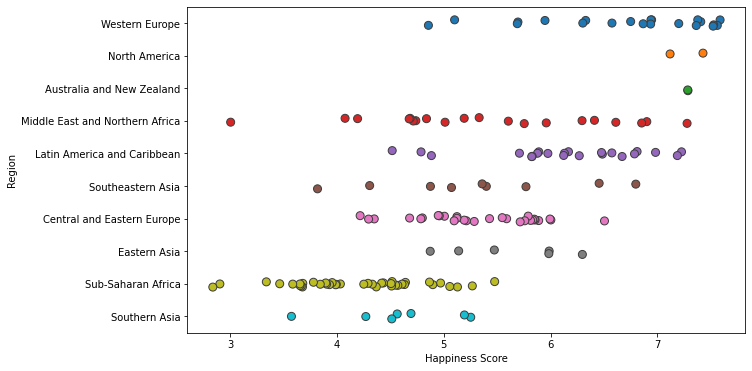

In [10]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='Happiness Score', y='Region', linewidth=1, size=8)

**Observations**

1) Western Europe Countries are happiest and have have only 2 countries around 5 Happiness Score. All the other Countries in this region are between 5.7-7.6.<br>
2) North America region would be the second happiest.<br>
3) Then Australia and New Zeland region has only one country and has high Happiness Score.<br>
4) Middle east and Northern Africa region has a vast distributed countries in terms of Happiness Score.<br>
5) Latin America and Caribbean region has most countries in a good Happiness Score range.<br>
6) Southeastern Asia region countries are also distributed evenly from low to high Happiness Score range.<br>
7) Central and Eastern Europe region has most of the countries with Happiness Score between 5-6.<br>
8) Same goes with Eastern Asia.<br>
9) Sub-Saharan Africa report the lowest Happiness Score and do not have a Happiness score above 5.7.<br>
10) same is followed by Southern Asia<br>

>We can see that as the GDP or Economy increasing the Happiness score also is increasing. However, it doesn't show the same trend till score is 5.

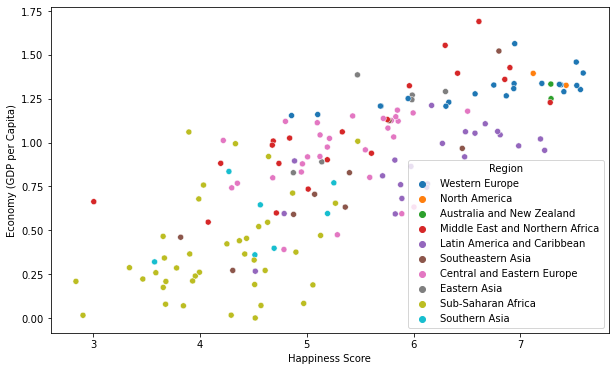

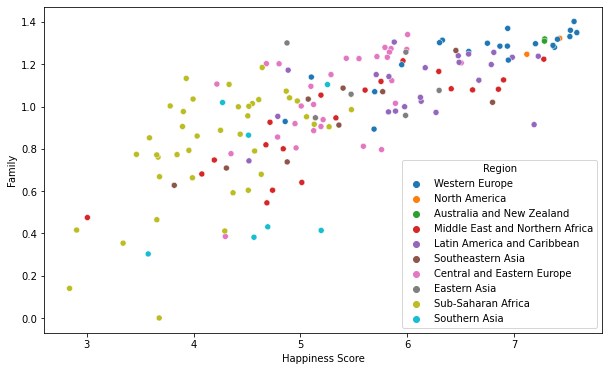

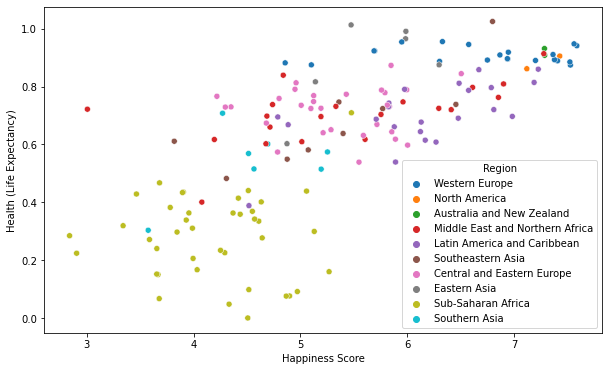

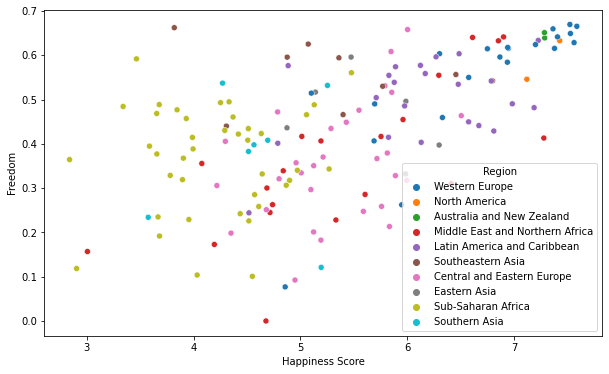

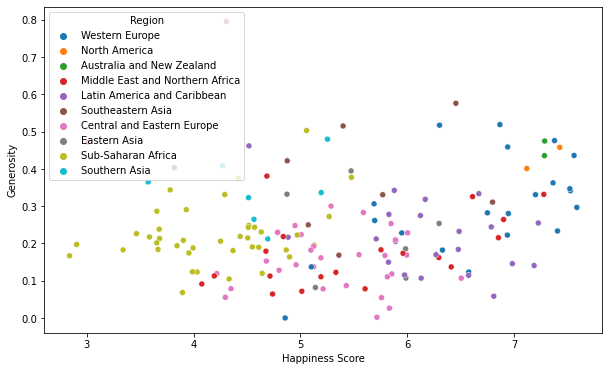

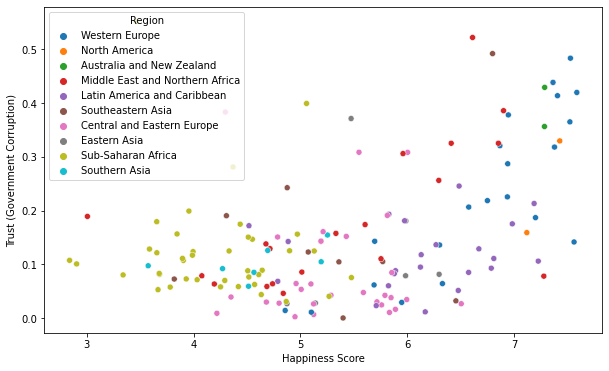

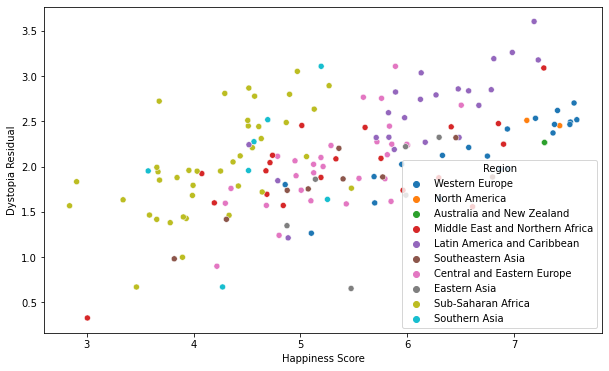

In [11]:
list = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', "Generosity", 'Trust (Government Corruption)',"Dystopia Residual"]

for i in list:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data = df, x='Happiness Score', y=i, hue='Region')

**Observations**
1) Features: "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom" shows direct proportional relation(On a broad scale) with Happiness score. That is, as the features increase, Happiness score increases.<br>
2) Feature "Freedom" is lot more spread when compared to "Economy", "Family" and "Health".<br>
3) "Generosity" as the correlation suggested has a linear type trend with spread of data on higher and lower side with respect to the Happiness Scores.<br>
4) Trust in the Government or the Corruption rate, has very less effect till the score of 6 and has a up tred from 6.9.<br>
    From this we may observe that the Happiness Score is high with the countries with more trust or less corruption in the country.<br>
5) Dystopia Residual has an uptrend and shows a moderate increase or hike as we move from low to high Happiness Score.<br>


Looking at the color or the region distribution in each scatter plots, it is evident that the region also plays role in Happiness Score (Small but yes it helps to understand the trends of the features). This may be due to different reasons like Continent, type of people and religion, Natural resources, type of government etc.

However, from the above plots we can observe that the Happiness scores rely upon the given 7 parameters/features on which the data was collected. **['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', "Generosity", 'Trust (Government Corruption)',"Dystopia Residual"]**


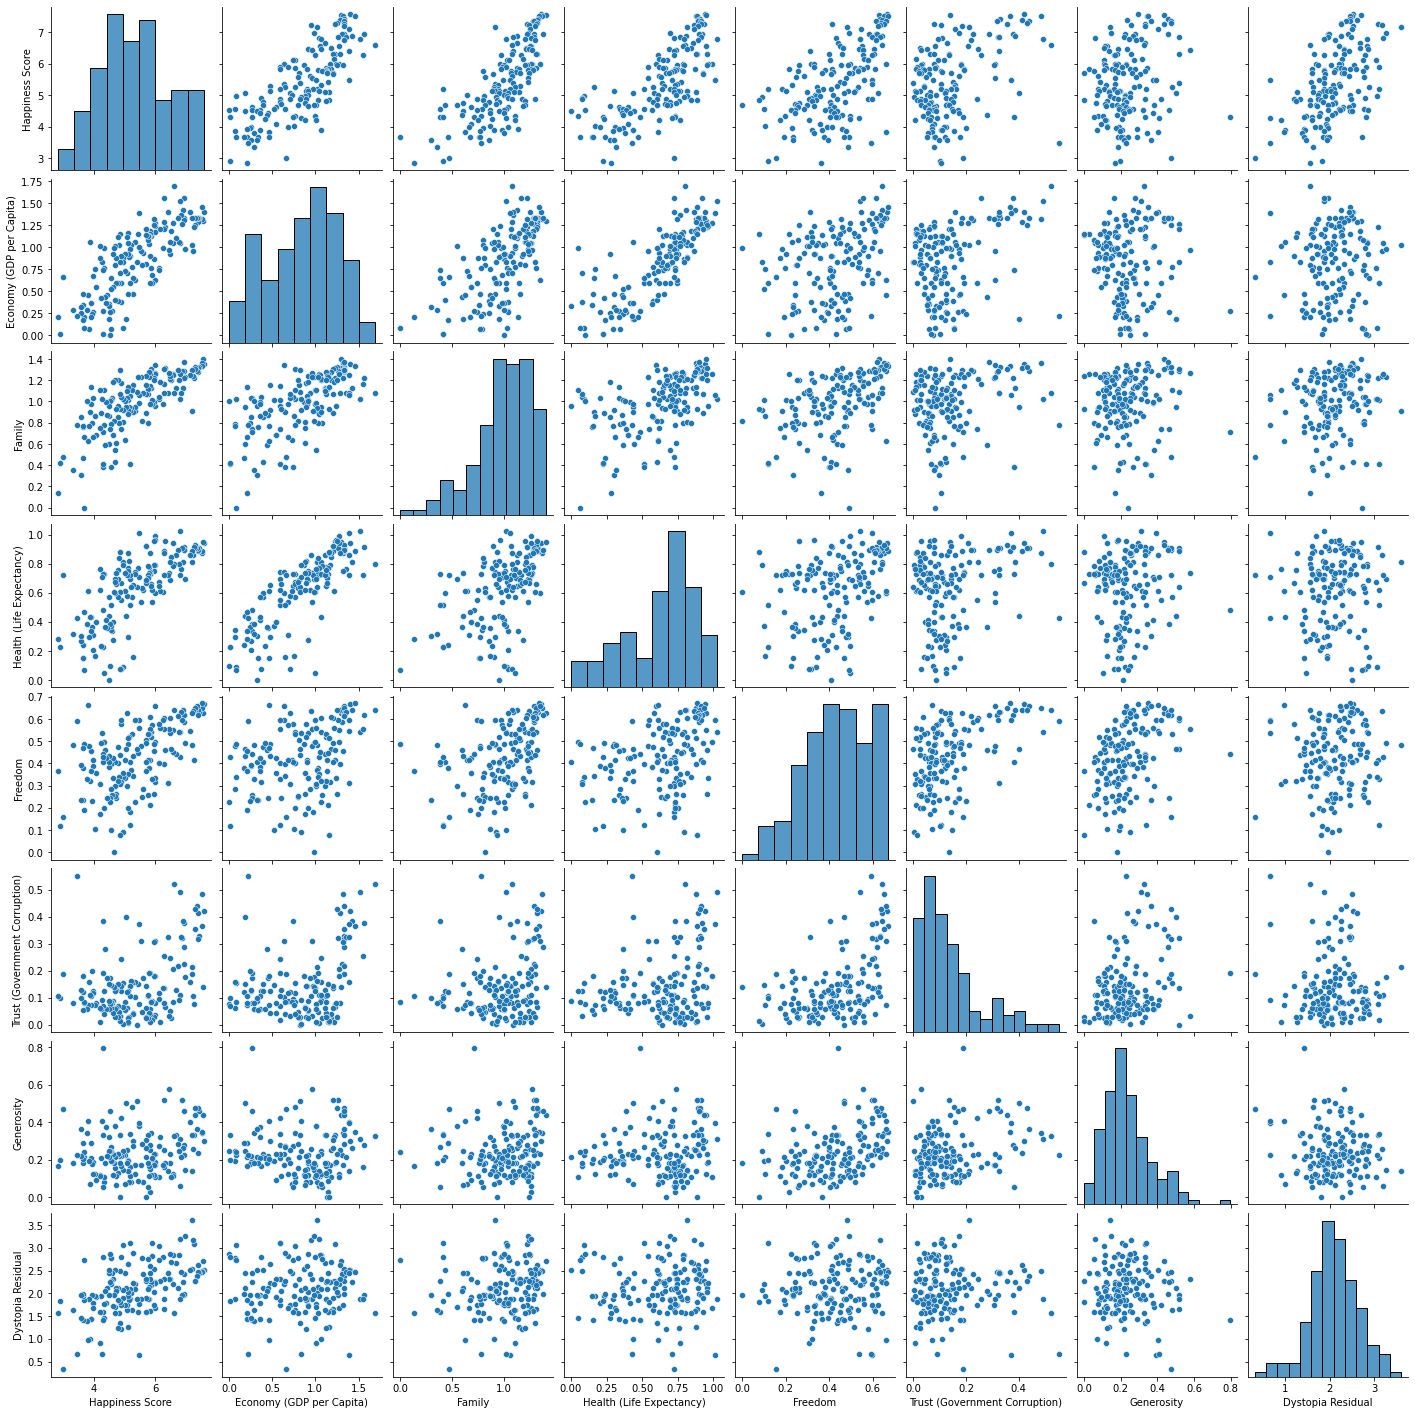

In [12]:
sns.pairplot(df.drop(['Country', 'Region', 'Happiness Rank',
       'Standard Error'],axis=1))

**Observations**

Features: Dystopia and Economy seems to be Normal distributed. (Happiness Score as well)
          Health, Family and Freedom are some what left skewed 
          Trust and Genrosity are slightly right skewed
            
1) With **LOW GDP**, Trust and Generosity is also **LOW**<br>
2) Same repeats with Family,Health and Freedom feature, With **LOW "FAMILY / HEALTH / FREEDOM" VALUE**, Trust and Generosity is also **LOW**<br>

# Outliers and Skewness

We do not want to remove Outliers in this data as each rows representand contains data of a country.

In [13]:
x= df.drop(['Country', 'Region', 'Happiness Rank','Standard Error','Happiness Score'],axis=1)

In [14]:
y= df['Happiness Score']

In [15]:
x.shape

(158, 7)

In [16]:
y.shape

(158,)

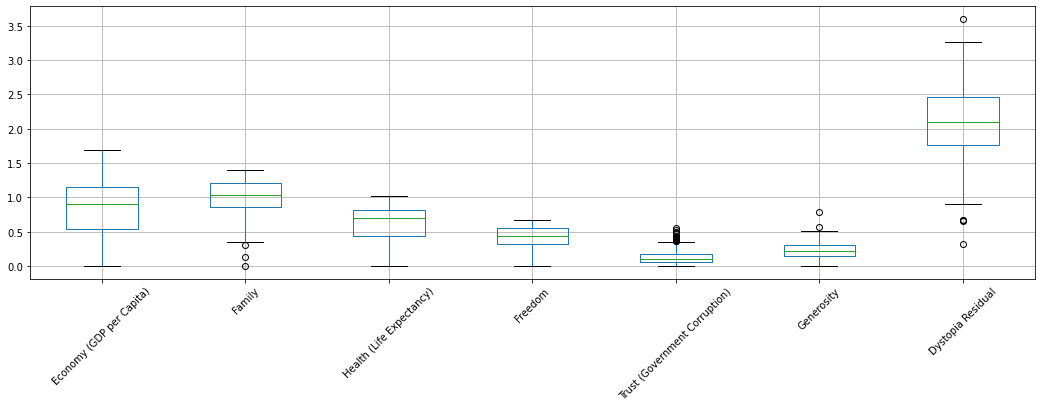

In [17]:
x.boxplot(figsize=(18,6))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

1) Columns Family, Trust, Generosity and Dystopia has Outliers. However for columns Family, Trust and Generosity outliers are very close to the whiskers. So that will be okay.<br>
2) Removing outlier will result in removal of a countries data. (Not recommended)

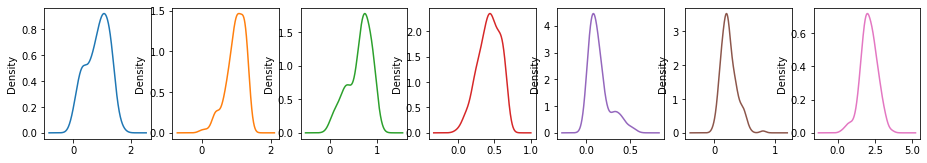

In [18]:
x.plot(kind="density", subplots =True, layout=(5,8), sharex=False, legend =False, figsize=(18,14))
plt.show()

Density plot show slight skewness, we will treat in next steps

In [19]:
x.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Using Power Transform to treat Skewness

In [20]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [21]:
df_new.skew()

Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

Great! All the columns have been treated.

In [22]:
x = df_new

# **Model Creation**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

Imported Metrics and train_test_split.

## Finding the best Random state for our model

In [24]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9961125136243143 on random state 129


We can see that the random state **129** is giving us **99.56%** confidence of good fit.<br>

## Best Algorithm for our problem.

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=129)

Training and testing all the Algorithm.

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.005670078246192221
0.9961125136243143


In [28]:
lr.intercept_

5.378347115512523

In [29]:
lr.coef_

array([0.40933809, 0.2765481 , 0.2547157 , 0.14268857, 0.0838635 ,
       0.11463154, 0.52549795])

In [30]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.2597715312500001
0.8218969395698278


In [31]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.10930910970937546
0.925056118049359


In [32]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.12023594874999997
0.9175645216276934


In [33]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.032048438334781396
0.9780271343747095


Lower Mean Squared Error the better and higher the r2_score the better.<br>
Looking at the above results Best algorithm would be **LinearRegression**. With 0.0056 Mean Squared Error and 0.9961 r2_score.

Crossvalidation wouldn't be a case here as it is normally done to check if model is overfit or over learnt the training data.<br>
Overfitting is really not a issue here. We will go ahead with LinearRegression model.

## Model

In [34]:
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred)*100)

0.005670078246192221
99.61125136243143


## Saving the Model

In [35]:
import joblib
joblib.dump(model,"World_Happiness_score_submission.pkl")

['World_Happiness_score_submission.pkl']